In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from jupyterthemes import jtplot
jtplot.style()

In [2]:
class Operation():
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.inputs = []
        self.output = None


In [3]:
class add(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        return x_var + y_var

In [4]:
class multiply(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        return x_var * y_var

In [5]:
class matmul(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
    
    def compute(self, x_var, y_var):
        return x_var.dot(y_var)

In [6]:
class sigmoid(Operation):
    def __init__(self, z):
        super().__init__([z])
    def compute(self, z_var):
        return 1 / (1 + np.exp(-z_var))

In [7]:
class Placeholder():
    def __init__(self):
        self.output = None

In [8]:
class Variable():
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output = None

In [9]:
def traverse_postorder(operation):
    nodes_postorder = []
    
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    
    recurse(operation)
    return nodes_postorder

In [10]:
class Session():
    
    def run(self, operation, feed_dict={}):
        for node in traverse_postorder(operation):
            if isinstance(node, Placeholder):
                node.output = feed_dict[node]
            elif isinstance(node, Variable):
                node.output = node.value
            else: #Operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)

            if type(node.output) == list:
                node.output = np.array(node.output)
            print(node, node.output)
        return operation.output

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [11]:
A = Variable(10)
b = Variable(1)
x = Placeholder()

y = multiply(A, x)
z = add(y, b)

In [13]:
sess = Session()
sess.run(operation=z, feed_dict={x:10})

<__main__.Variable object at 0x120bc2208> 10
<__main__.Placeholder object at 0x120bc2198> 10
<__main__.multiply object at 0x120bc2160> 100
<__main__.Variable object at 0x120bc2320> 1
<__main__.add object at 0x120bc2390> 101


101

In [14]:
A = Variable([[10, 20],[30,40]])
b = Variable([1,1])
x = Placeholder()

y = matmul(A,x)
z = add(y,b)

Sess = Session()
sess.run(z, {x:10})

<__main__.Variable object at 0x120bc81d0> [[10 20]
 [30 40]]
<__main__.Placeholder object at 0x120bc8208> 10
<__main__.matmul object at 0x120bc8278> [[100 200]
 [300 400]]
<__main__.Variable object at 0x120bc8160> [1 1]
<__main__.add object at 0x120bc82b0> [[101 201]
 [301 401]]


array([[101, 201],
       [301, 401]])

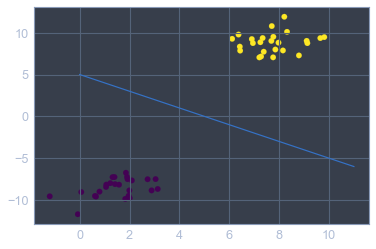

In [15]:
data = make_blobs(n_samples=50, n_features=2,centers=2,random_state=75)
features = data[0]
lables = data[1]
plt.scatter(features[:, 0], features[:,1],c=lables)

x = np.linspace(0, 11, 10)
y = - x + 5 # We're gonna divide our two blobs here
plt.plot(x, y)

Now let's use our classifier w/ our sigmoid func to predict if a data point is part of the yellow or purlpe group:

- Y = Mx + b
- Y = -1x + 5
- OR:
- f2 = -(f1) + 5
- f2 + f1 - 5 = 0
- `[[f2],[f1]][1,1] -5 = 0` # Matrix Representation

Purple Group point: 2, -10:

In [16]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [17]:
#Doing the same with our classifier logic:
x = Placeholder() # Our two points
w = Variable([1,1]) # Our weights
b = Variable(-5) # Our bias
z = add(matmul(w, x), b)
sess = Session()
sess.run(z, feed_dict={x: np.array([[2],[-10]])})

<__main__.Variable object at 0x120bc2518> [1 1]
<__main__.Placeholder object at 0x120bc20b8> [[  2]
 [-10]]
<__main__.matmul object at 0x120bc2e48> [-8]
<__main__.Variable object at 0x120bc2d30> -5
<__main__.add object at 0x122ce84e0> [-13]


array([-13])

In [18]:
#Now adding in our sigmoid function:
a = sigmoid(z)
sess = Session()
sess.run(a, feed_dict={x: np.array([[2],[-10]])})

<__main__.Variable object at 0x120bc2518> [1 1]
<__main__.Placeholder object at 0x120bc20b8> [[  2]
 [-10]]
<__main__.matmul object at 0x120bc2e48> [-8]
<__main__.Variable object at 0x120bc2d30> -5
<__main__.add object at 0x122ce84e0> [-13]
<__main__.sigmoid object at 0x120bc2908> [2.2603243e-06]


array([2.2603243e-06])

In [19]:
# The result is very close to zero, meaning it is likely in the purple group

In [20]:
# Trying now with a yellow member:
sess.run(a, feed_dict={x: np.array([[8],[10]])})

<__main__.Variable object at 0x120bc2518> [1 1]
<__main__.Placeholder object at 0x120bc20b8> [[ 8]
 [10]]
<__main__.matmul object at 0x120bc2e48> [18]
<__main__.Variable object at 0x120bc2d30> -5
<__main__.add object at 0x122ce84e0> [13]
<__main__.sigmoid object at 0x120bc2908> [0.99999774]


array([0.99999774])